# Population and household change 2020 vs 2010

In [1]:
import geopandas as gpd
import numpy as np
import pandas as pd
from shapely.geometry import Point
import osmnx as ox

import os
import sys
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)
    import aup

/home/edgar/anaconda3/envs/geo_env/lib/python3.8/site-packages/geopandas/_compat.py:111: UserWarning: The Shapely GEOS version (3.10.1-CAPI-1.16.0) is incompatible with the GEOS version PyGEOS was compiled with (3.9.1-CAPI-1.14.2). Conversions between both will be slow.
  warnings.warn(


In [17]:
res = 9 # analysis resolution
c = 'ZMVM'

## 2020

### Download block centroids

In [3]:
df = pd.read_json("../scripts/Metropolis_CVE.json")

In [4]:
df = pd.read_json("../scripts/Metropolis_CVE.json")

year = 2020

#Folder names from database
block_schema = 'censo'
block_cnt_folder = f'censo_mza_centroid_{year}'
block_census_schema = 'censo_mza'
block_census_folder = f'censo_mza_{year}'
mpos_schema = 'marco'
mpos_folder = f'mpos_{year}'

# Creates empty GeoDataFrame to store block locations
block_centroid = gpd.GeoDataFrame()
block_pop = pd.DataFrame()
mun_gdf = gpd.GeoDataFrame()
# Iterates over municipality codes for each metropolitan area or capital
for i in range(len(df.loc["mpos", c])):
    # Extracts specific municipality code
    m = df.loc["mpos", c][i]
    # Downloads municipality polygon according to code
    query = f"SELECT cvegeo,pobtot,geometry FROM {block_schema}.{block_cnt_folder} WHERE \"cvegeo\" LIKE \'{m}%%\'"
    block_centroid = block_centroid.append(aup.gdf_from_query(query, geometry_col='geometry'))
    #query = f"SELECT * FROM {block_census_schema}.{block_census_folder} WHERE \"CVEGEO\" LIKE \'{m}%%\'"
    #block_pop = block_pop.append(aup.df_from_query(query))
    # Downloads municipality polygon according to code
    query = f"SELECT * FROM {mpos_schema}.{mpos_folder} WHERE \"CVEGEO\" LIKE \'{m}\'"
    mun_gdf = mun_gdf.append(aup.gdf_from_query(query, geometry_col='geometry'))

block_centroid = block_centroid.to_crs("EPSG:4326")
print(block_centroid.shape)
block_centroid.head(2)

(177128, 3)


,cvegeo,pobtot,geometry
0,0900200011165026,0,POINT (-99.15810 19.49828)
1,0900200010580028,24,POINT (-99.14822 19.46882)


### Download hex_census data

In [5]:
#gdf_tmp = block_centroid.copy()
#point_wkt = gdf_tmp.reset_index().geometry.to_wkt()

gdf_tmp = mun_gdf.copy()
gdf_tmp = gdf_tmp.to_crs("EPSG:6372")
gdf_tmp = gdf_tmp.buffer(1).reset_index().rename(columns={0:'geometry'})
gdf_tmp = gdf_tmp.to_crs("EPSG:4326")
poly_wkt = gdf_tmp.dissolve().geometry.to_wkt()[0]

In [18]:
hex_schema = 'censo'
hex_folder = f'hex_censo_mza_{year}_res{res}'

hex_census_20 = gpd.GeoDataFrame()

query = f"SELECT * FROM {hex_schema}.{hex_folder} WHERE (ST_Intersects(geometry, \'SRID=4326; {poly_wkt}\'))"
hex_census_20 = hex_census_20.append(aup.gdf_from_query(query, geometry_col='geometry'))

print(hex_census_20.shape)
print('hex_pobtot: ', hex_census_20.pobtot.sum())
print('block_pobtot: ', block_centroid.pobtot.sum())
hex_census_20.head(2)

(18270, 193)
hex_pobtot:  20357857.0
block_pobtot:  20357166


,hex_id_9,geometry,pobtot,pobmas,pobfem,p_0a2,p_0a2_m,p_0a2_f,p_3ymas,p_3ymas_m,...,vph_radio,vph_tv,vph_refri,vph_lavad,vph_autom,vph_pc,vph_telef,vph_cel,vph_inter,dens_pob_ha
0,894995b3453ffff,"POLYGON ((-99.25984 19.31054, -99.25860 19.312...",484.0,246.0,238.0,22.0,10.0,9.0,462.0,234.0,...,127.0,133.0,117.0,94.0,53.0,50.0,81.0,85.0,41.0,40.138976
1,894995a95abffff,"POLYGON ((-99.08328 19.61556, -99.08204 19.617...",1660.0,807.0,853.0,43.0,11.0,5.0,1553.0,753.0,...,407.0,427.0,426.0,406.0,316.0,295.0,388.0,373.0,238.0,137.733620


<AxesSubplot:>

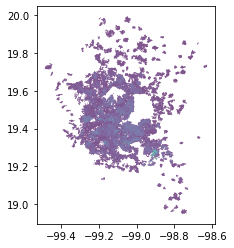

In [19]:
hex_census_20.plot('dens_pob_ha', 'viridis')

## 2010

### Download block centroids

In [8]:
df = pd.read_json("../scripts/Metropolis_CVE.json")

year = 2010

#Folder names from database
block_schema = 'censo'
block_cnt_folder = f'censo_mza_centroid_{year}'

# Creates empty GeoDataFrame to store block locations
block_centroid = gpd.GeoDataFrame()
block_pop = pd.DataFrame()
mun_gdf = gpd.GeoDataFrame()
# Iterates over municipality codes for each metropolitan area or capital
for i in range(len(df.loc["mpos", c])):
    # Extracts specific municipality code
    m = df.loc["mpos", c][i]
    # Downloads municipality polygon according to code
    query = f"SELECT cvegeo,pobtot,geometry FROM {block_schema}.{block_cnt_folder} WHERE \"cvegeo\" LIKE \'{m}%%\'"
    block_centroid = block_centroid.append(aup.gdf_from_query(query, geometry_col='geometry'))

block_centroid = block_centroid.to_crs("EPSG:4326")
print(block_centroid.shape)
block_centroid.head(2)

(166203, 3)


,cvegeo,pobtot,geometry
0,0900200010133002,25,POINT (-99.18002 19.49504)
1,0900200010129023,226,POINT (-99.17700 19.49851)


### Download hex_census data

In [20]:
hex_schema = 'censo'
hex_folder = f'hex_censo_mza_{year}_res{res}'

hex_census_10 = gpd.GeoDataFrame()

query = f"SELECT * FROM {hex_schema}.{hex_folder} WHERE (ST_Intersects(geometry, \'SRID=4326; {poly_wkt}\'))"
hex_census_10 = hex_census_10.append(aup.gdf_from_query(query, geometry_col='geometry'))

print(hex_census_10.shape)
print('hex_pobtot: ', hex_census_10.pobtot.sum())
print('block_pobtot: ', block_centroid.pobtot.sum())
hex_census_10.head(2)

(18270, 193)
hex_pobtot:  20357857.0
block_pobtot:  20357166


,hex_id_9,geometry,pobtot,pobmas,pobfem,p_0a2,p_0a2_m,p_0a2_f,p_3ymas,p_3ymas_m,...,vph_radio,vph_tv,vph_refri,vph_lavad,vph_autom,vph_pc,vph_telef,vph_cel,vph_inter,dens_pob_ha
0,894995b3453ffff,"POLYGON ((-99.25984 19.31054, -99.25860 19.312...",484.0,246.0,238.0,22.0,10.0,9.0,462.0,234.0,...,127.0,133.0,117.0,94.0,53.0,50.0,81.0,85.0,41.0,40.138976
1,89499516b87ffff,"POLYGON ((-99.05058 19.53371, -99.04934 19.535...",2662.0,1257.0,1405.0,156.0,86.0,70.0,2500.0,1168.0,...,570.0,632.0,561.0,456.0,223.0,174.0,375.0,415.0,118.0,220.969738


<AxesSubplot:>

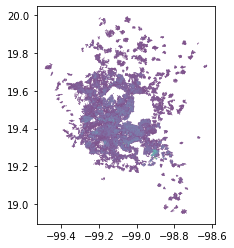

In [21]:
hex_census_10.plot('dens_pob_ha', 'viridis')

## Data comparison

In [27]:
hex_census_10 = hex_census_10.add_prefix('10_')
hex_census_10.drop(columns=['10_geometry'], inplace=True)
hex_census_10.rename(columns={f'10_hex_id_{res}':f'hex_id_{res}'}, inplace=True)

KeyError: "['10_geometry'] not found in axis"

In [23]:
hex_mrg = hex_census_20.merge(hex_census_10, on=f'hex_id_{res}', how='left')
print(hex_mrg.shape)
hex_mrg.head(2)

(18270, 384)


,hex_id_9,geometry,pobtot,pobmas,pobfem,p_0a2,p_0a2_m,p_0a2_f,p_3ymas,p_3ymas_m,...,10_vph_radio,10_vph_tv,10_vph_refri,10_vph_lavad,10_vph_autom,10_vph_pc,10_vph_telef,10_vph_cel,10_vph_inter,10_dens_pob_ha
0,894995b3453ffff,"POLYGON ((-99.25984 19.31054, -99.25860 19.312...",484.0,246.0,238.0,22.0,10.0,9.0,462.0,234.0,...,127.0,133.0,117.0,94.0,53.0,50.0,81.0,85.0,41.0,40.138976
1,894995a95abffff,"POLYGON ((-99.08328 19.61556, -99.08204 19.617...",1660.0,807.0,853.0,43.0,11.0,5.0,1553.0,753.0,...,407.0,427.0,426.0,406.0,316.0,295.0,388.0,373.0,238.0,137.733620


In [24]:
hex_mrg_10_20 = hex_mrg.copy()
hex_mrg_10_20.replace(np.nan, 0, inplace=True)

### Change calculation

In [25]:
hex_mrg_10_20['T_Pob_10_20'] = hex_mrg_10_20['pobtot'] - hex_mrg_10_20['10_pobtot']
hex_mrg_10_20['T_Viv_10_20'] = hex_mrg_10_20['vivtot'] - hex_mrg_10_20['10_vivtot']
hex_mrg_10_20['R_TViv_10_20'] = (hex_mrg_10_20['vivtot'] - hex_mrg_10_20['10_vivtot']) / hex_mrg_10_20['10_vivtot']
hex_mrg_10_20['T_VivDes_10_20'] = hex_mrg_10_20['vivpar_des'] - hex_mrg_10_20['10_vivpar_des']
hex_mrg_10_20['R_TVivDes_10_20'] = (hex_mrg_10_20['vivpar_des'] - hex_mrg_10_20['10_vivpar_des']) / hex_mrg_10_20['10_vivpar_des']
hex_mrg_10_20['Z_RTVivDes_10_20'] = (hex_mrg_10_20['R_TVivDes_10_20']-hex_mrg_10_20['R_TVivDes_10_20'].mean()) / hex_mrg_10_20['R_TVivDes_10_20'].std()
hex_mrg_10_20['Z_RTViv_10_20'] = (hex_mrg_10_20['R_TViv_10_20']-hex_mrg_10_20['R_TViv_10_20'].mean()) / hex_mrg_10_20['R_TViv_10_20'].std()
hex_mrg_10_20['R_VivHab_20'] = hex_mrg_10_20['tvivparhab'] / hex_mrg_10_20['vivtot']
hex_mrg_10_20['R_VivDes_20'] = hex_mrg_10_20['vivpar_des'] / hex_mrg_10_20['vivtot']
hex_mrg_10_20['Z_RVivHab_20'] = (hex_mrg_10_20['R_VivHab_20'] - hex_mrg_10_20['R_VivHab_20'].mean()) / hex_mrg_10_20['R_VivHab_20'].std()
hex_mrg_10_20['R_VivHab_10'] = hex_mrg_10_20['10_tvivparhab'] / hex_mrg_10_20['10_vivtot']
hex_mrg_10_20['Z_RVivHab_10'] = (hex_mrg_10_20['R_VivHab_10'] - hex_mrg_10_20['R_VivHab_10'].mean()) / hex_mrg_10_20['R_VivHab_10'].std()
hex_mrg_10_20['Chng_RVivHab_10'] = hex_mrg_10_20['R_VivHab_20'] - hex_mrg_10_20['R_VivHab_10']

<AxesSubplot:>

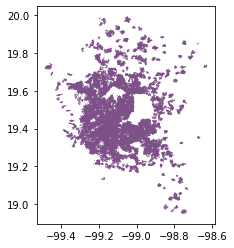

In [26]:
hex_mrg_10_20.plot('T_Pob_10_20')

In [28]:
hex_mrg_10_20.to_file(f'../data/processed/pop_chng/{c}_Census_10_20_BlockAnalysis_res{res}.geojson', driver='GeoJSON')

In [17]:
hex_bins = gpd.GeoDataFrame()
hex_folder = 'hex_bins_pop_2020'
c = 'ZMVM'
# Iterates over municipality codes for each metropolitan area or capital
for i in range(len(df.loc["mpos", c])):
    # Extracts specific municipality code
    m = df.loc["mpos", c][i]
    # Downloads municipality polygon according to code
    query = f"SELECT * FROM censo.{hex_folder} WHERE \"CVEGEO\" LIKE \'{m}%%\'"
    hex_bins = hex_bins.append(aup.gdf_from_query(query, geometry_col='geometry'))

In [18]:
print(hex_bins.shape)
hex_bins.head(2)

(3767, 225)


,geometry,hex_id_8,CVEGEO,pobtot,pobfem,pobmas,p_0a2,p_0a2_f,p_0a2_m,p_3ymas,...,vph_telef,vph_cel,vph_inter,vph_stvp,vph_spmvpi,vph_cvj,vph_sinrtv,vph_sintlc,vph_sincint,vph_sintic
0,"POLYGON ((-99.17740 19.48241, -99.17776 19.487...",884995b8c1fffff,09002,14474.150,7629.7427,6844.4077,397.1297,201.98712,195.14255,14076.893,...,3291.8496,4331.3076,3775.7168,2321.447,1888.8503,1201.4825,62.35107,83.08192,683.6730,5.065773
1,"POLYGON ((-99.15333 19.47646, -99.15369 19.481...",884995b817fffff,09002,11224.782,5932.0500,5292.7334,290.3793,139.58163,150.79770,10822.335,...,2236.9870,3080.4670,2551.8333,1594.311,1102.6494,662.1067,32.58291,79.75566,665.7047,8.809484


## Centroid hex selection

In [19]:
hex_bins.pobtot.sum()

20996445.9109602

In [20]:
hex_bins = hex_bins.to_crs("EPSG:32614")

In [21]:
hex_bins['dens_pobha'] = hex_bins.pobtot / (hex_bins.area/10000)

<AxesSubplot:>

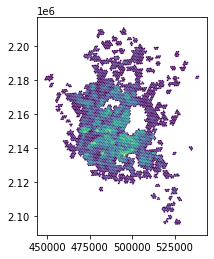

In [22]:
hex_bins.plot('dens_pobha', 'viridis')

In [23]:
hex_bins_10 = gpd.GeoDataFrame()

hex_folder = 'hex_bins_pop_2010'

for i in range(len(df.loc["mpos", c])):
    # Extracts specific municipality code
    m = df.loc["mpos", c][i]
    # Downloads municipality polygon according to code
    query = f"SELECT * FROM censo.{hex_folder} WHERE \"CVEGEO\" LIKE \'{m}%%\'"
    hex_bins_10 = hex_bins_10.append(aup.gdf_from_query(query, geometry_col='geometry'))

In [24]:
print(hex_bins_10.shape)
hex_bins_10.head(2)

(3686, 193)


,geometry,hex_id_8,CVEGEO,pobtot,pobmas,pobfem,p_0a2,p_0a2_m,p_0a2_f,p_3ymas,...,vph_snbien,vph_radio,vph_tv,vph_refri,vph_lavad,vph_autom,vph_pc,vph_telef,vph_cel,vph_inter
0,"POLYGON ((-99.17740 19.48241, -99.17776 19.487...",884995b8c1fffff,09002,14620.1660,6851.2324,7768.9350,516.29626,257.641300,258.654900,13884.6800,...,2.118699,3996.00000,4193.96400,3992.84030,3437.3975,1876.21890,2331.57930,3196.77220,3404.1099,68440.0
1,"POLYGON ((-99.17884 19.50300, -99.17848 19.497...",884995b88dfffff,09002,1322.2435,634.7679,687.4756,67.84711,36.566658,30.795612,1240.3895,...,0.000000,316.32776,337.11166,315.69006,273.3502,140.18404,151.70692,229.29893,261.7818,1971.0


In [25]:
hex_bins_10.pobtot.sum()

19423565.6248095

In [26]:
hex_bins_10 = hex_bins_10.to_crs("EPSG:32614")

In [27]:
hex_bins_10['dens_pobha'] = hex_bins_10.pobtot / (hex_bins_10.area/10000)

<AxesSubplot:>

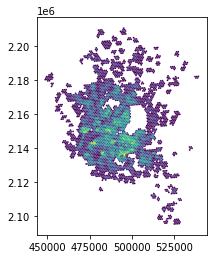

In [28]:
hex_bins_10.plot('dens_pobha', 'viridis')

In [29]:
hex_bins_10 = hex_bins_10[['hex_id_8','pobtot','vivtot','tvivparhab','vivpar_des','ocupvivpar','prom_ocup']].copy()

In [30]:
hex_bins_10 = hex_bins_10.add_prefix('10_')

In [31]:
hex_bins_10.head(2)

,10_hex_id_8,10_pobtot,10_vivtot,10_tvivparhab,10_vivpar_des,10_ocupvivpar,10_prom_ocup
0,884995b8c1fffff,14620.1660,4915.97170,4326.72850,402.86720,14342.2890,3.381128
1,884995b88dfffff,1322.2435,740.65454,346.94568,378.88745,1307.1647,3.826977


In [32]:
hex_bins_10.rename(columns={'10_hex_id_8':'hex_id_8'}, inplace=True)

In [33]:
hex_mrg = hex_bins.merge(hex_bins_10, on='hex_id_8', how='left')
print(hex_mrg.shape)
hex_mrg.head(2)

(3767, 232)


,geometry,hex_id_8,CVEGEO,pobtot,pobfem,pobmas,p_0a2,p_0a2_f,p_0a2_m,p_3ymas,...,vph_sintlc,vph_sincint,vph_sintic,dens_pobha,10_pobtot,10_vivtot,10_tvivparhab,10_vivpar_des,10_ocupvivpar,10_prom_ocup
0,"POLYGON ((481383.577 2154216.063, 481346.266 2...",884995b8c1fffff,09002,14474.150,7629.7427,6844.4077,397.1297,201.98712,195.14255,14076.893,...,83.08192,683.6730,5.065773,170.613739,14620.166,4915.9717,4326.7285,402.86720,14342.289,3.381128
1,"POLYGON ((483908.276 2153555.715, 483870.991 2...",884995b817fffff,09002,11224.782,5932.0500,5292.7334,290.3793,139.58163,150.79770,10822.335,...,79.75566,665.7047,8.809484,132.338941,13237.348,4207.1143,3775.5078,315.58203,12741.941,3.537866


In [34]:
hex_mrg_10_20 = hex_mrg.copy()

In [35]:
hex_mrg_10_20.replace(np.nan, 0, inplace=True)

In [36]:
hex_mrg_10_20['T_Pob_10_20'] = hex_mrg_10_20['pobtot'] - hex_mrg_10_20['10_pobtot']
hex_mrg_10_20['T_Viv_10_20'] = hex_mrg_10_20['vivtot'] - hex_mrg_10_20['10_vivtot']
hex_mrg_10_20['R_TViv_10_20'] = (hex_mrg_10_20['vivtot'] - hex_mrg_10_20['10_vivtot']) / hex_mrg_10_20['10_vivtot']
hex_mrg_10_20['T_VivDes_10_20'] = hex_mrg_10_20['vivpar_des'] - hex_mrg_10_20['10_vivpar_des']
hex_mrg_10_20['R_TVivDes_10_20'] = (hex_mrg_10_20['vivpar_des'] - hex_mrg_10_20['10_vivpar_des']) / hex_mrg_10_20['10_vivpar_des']
hex_mrg_10_20['Z_RTVivDes_10_20'] = (hex_mrg_10_20['R_TVivDes_10_20']-hex_mrg_10_20['R_TVivDes_10_20'].mean()) / hex_mrg_10_20['R_TVivDes_10_20'].std()
hex_mrg_10_20['Z_RTViv_10_20'] = (hex_mrg_10_20['R_TViv_10_20']-hex_mrg_10_20['R_TViv_10_20'].mean()) / hex_mrg_10_20['R_TViv_10_20'].std()
hex_mrg_10_20['R_VivHab_20'] = hex_mrg_10_20['tvivparhab'] / hex_mrg_10_20['vivtot']
hex_mrg_10_20['R_VivDes_20'] = hex_mrg_10_20['vivpar_des'] / hex_mrg_10_20['vivtot']
hex_mrg_10_20['Z_RVivHab_20'] = (hex_mrg_10_20['R_VivHab_20'] - hex_mrg_10_20['R_VivHab_20'].mean()) / hex_mrg_10_20['R_VivHab_20'].std()
hex_mrg_10_20['R_VivHab_10'] = hex_mrg_10_20['10_tvivparhab'] / hex_mrg_10_20['10_vivtot']
hex_mrg_10_20['Z_RVivHab_10'] = (hex_mrg_10_20['R_VivHab_10'] - hex_mrg_10_20['R_VivHab_10'].mean()) / hex_mrg_10_20['R_VivHab_10'].std()
hex_mrg_10_20['Chng_RVivHab_10'] = hex_mrg_10_20['R_VivHab_20'] - hex_mrg_10_20['R_VivHab_10']

<AxesSubplot:>

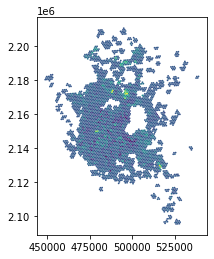

In [37]:
hex_mrg_10_20.plot('T_Pob_10_20')

In [38]:
hex_mrg_10_20.to_file(f'/home/edgar/SIG/ObsCds/Proyectos/Vivienda_Deshabitada/Info_Sociodemografica/Analisis/Hexbins_{c}_AnalisisVivienda_OC22_UTM_v1.geojson')

In [39]:
hex_schema = 'censo'
hex_folder = f'hex_censo_mza_{year}_res8'

hex_census = gpd.GeoDataFrame()

hex_id = []

for i in range(len(point_wkt)):
    
    query = f"SELECT hex_id_8 FROM {hex_schema}.{hex_folder} WHERE (ST_Intersects(geometry, \'SRID=4326; {point_wkt[i]}\'))"
    hex_tmp = aup.df_from_query(query)
    idx = hex_tmp.hex_id_8.values[0]
    
    if idx not in hex_id:
        query = f"SELECT * FROM {hex_schema}.{hex_folder} WHERE (ST_Intersects(geometry, \'SRID=4326; {point_wkt[i]}\'))"
        hex_census = hex_census.append(aup.gdf_from_query(query, geometry_col='geometry'))
        hex_id.append(idx)

        
    if i % 250 == 0:
        print(i)
    
print(hex_census.shape)
hex_census.head(2)

NameError: name 'point_wkt' is not defined